[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5127 entries, 2004-08-19 to 2024-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5127 non-null   float64
 1   (Close, GOOG)      5127 non-null   float64
 2   (High, GOOG)       5127 non-null   float64
 3   (Low, GOOG)        5127 non-null   float64
 4   (Open, GOOG)       5127 non-null   float64
 5   (Volume, GOOG)     5127 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 280.4 KB
40.0
2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
(3518, 100, 1)
(3518, 1)
(1509, 100, 1)
(1509, 1)


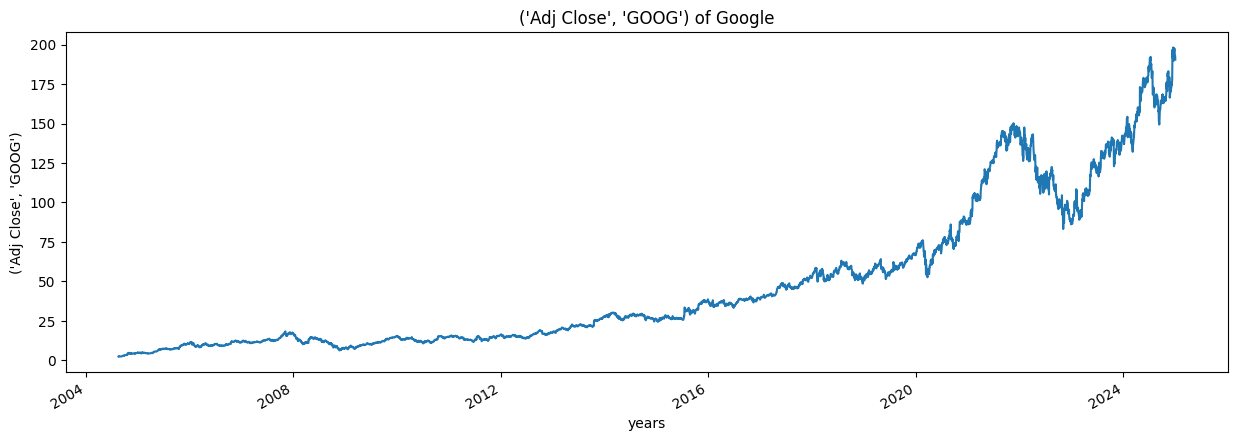

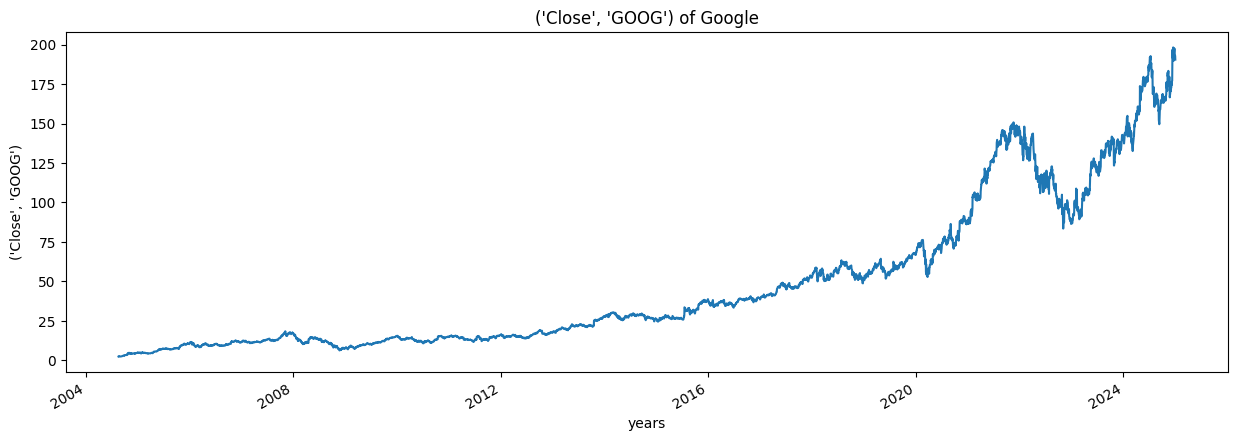

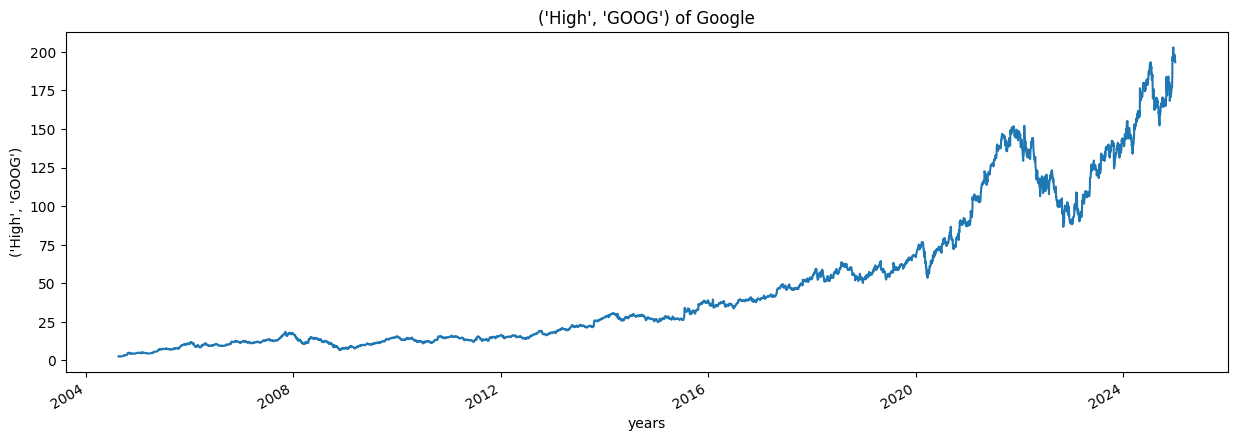

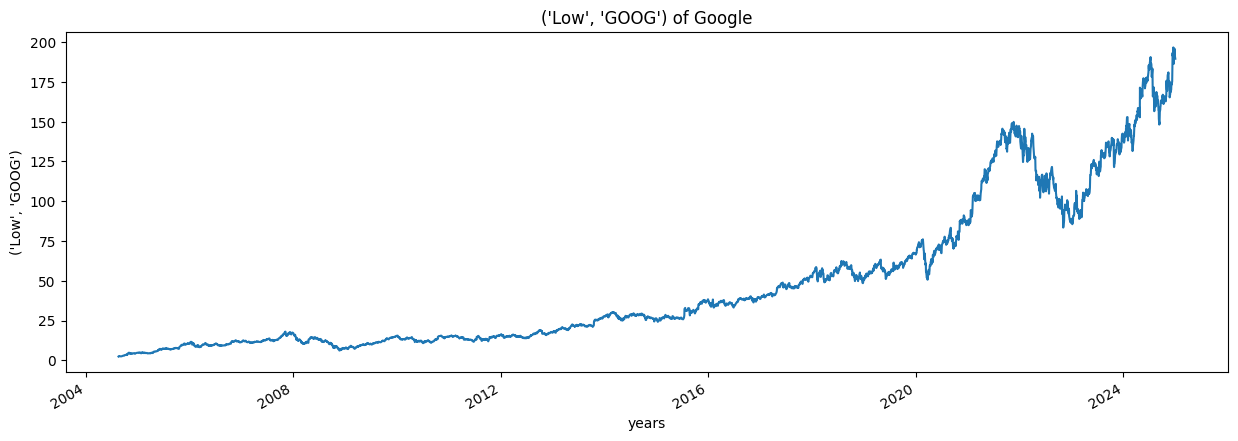

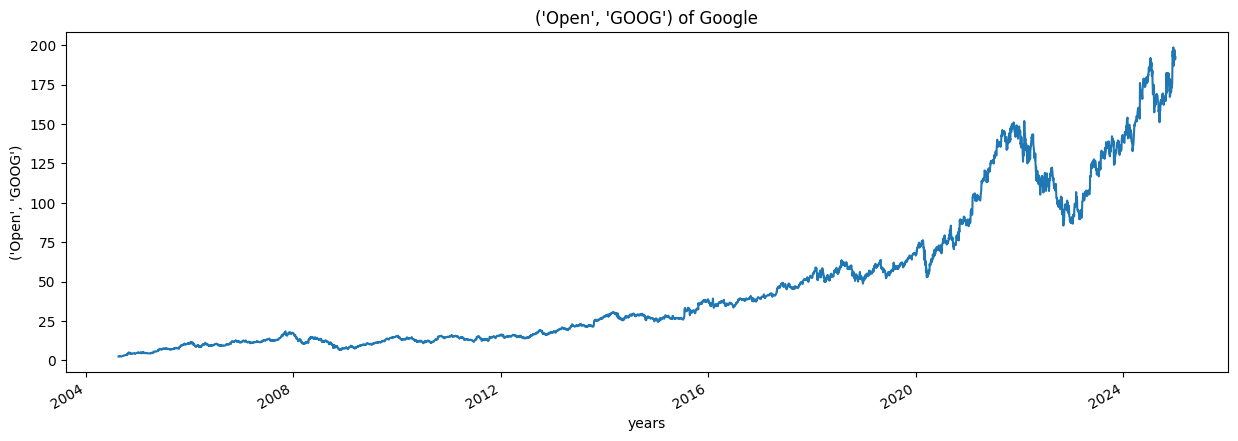

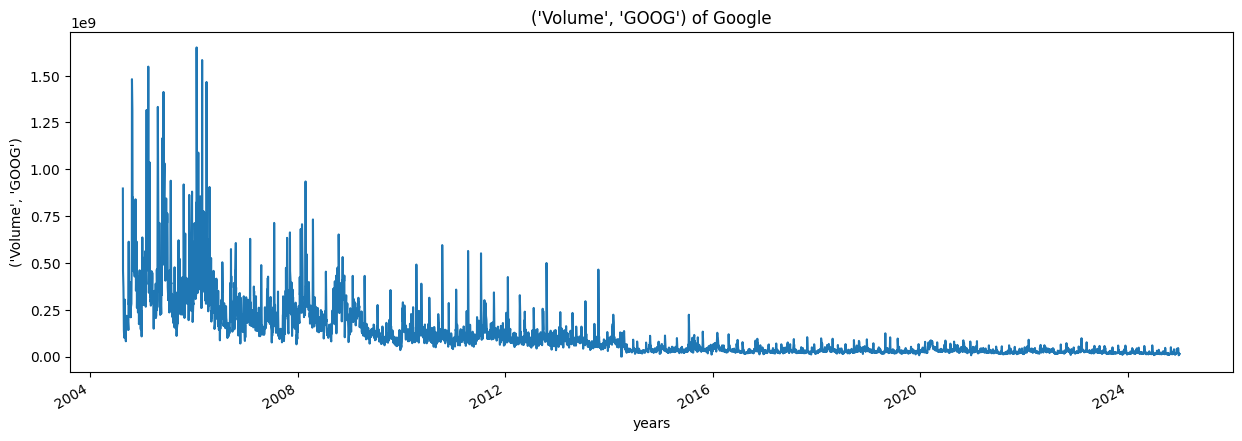

<Figure size 1500x500 with 0 Axes>

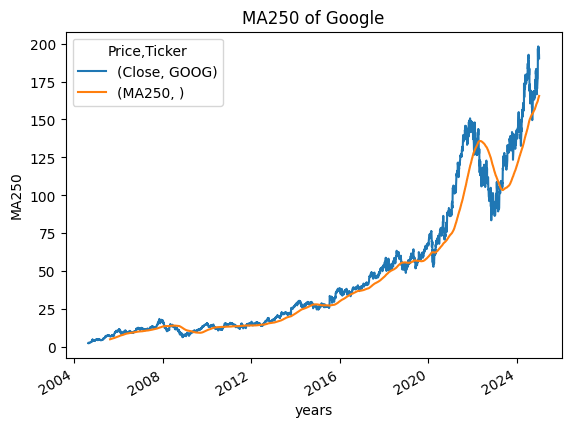

<Figure size 1500x500 with 0 Axes>

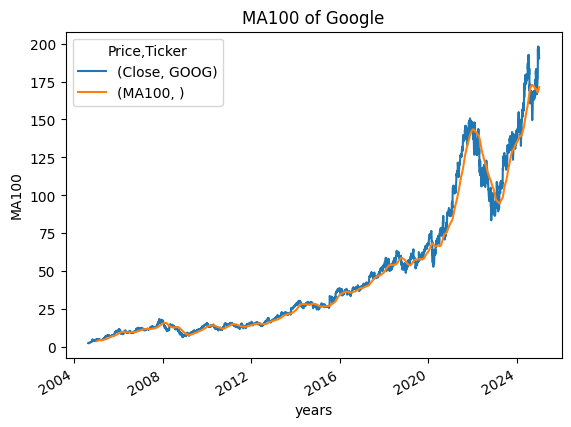

<Figure size 1500x500 with 0 Axes>

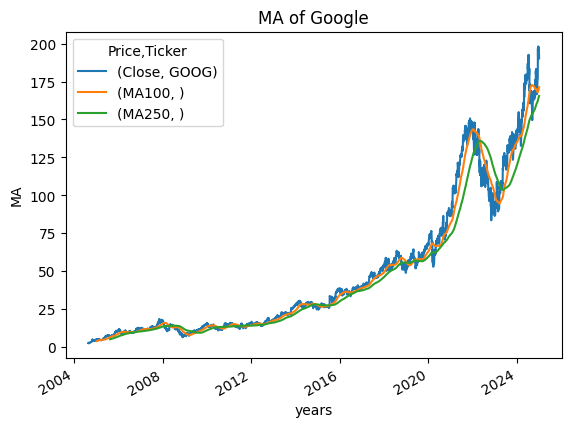

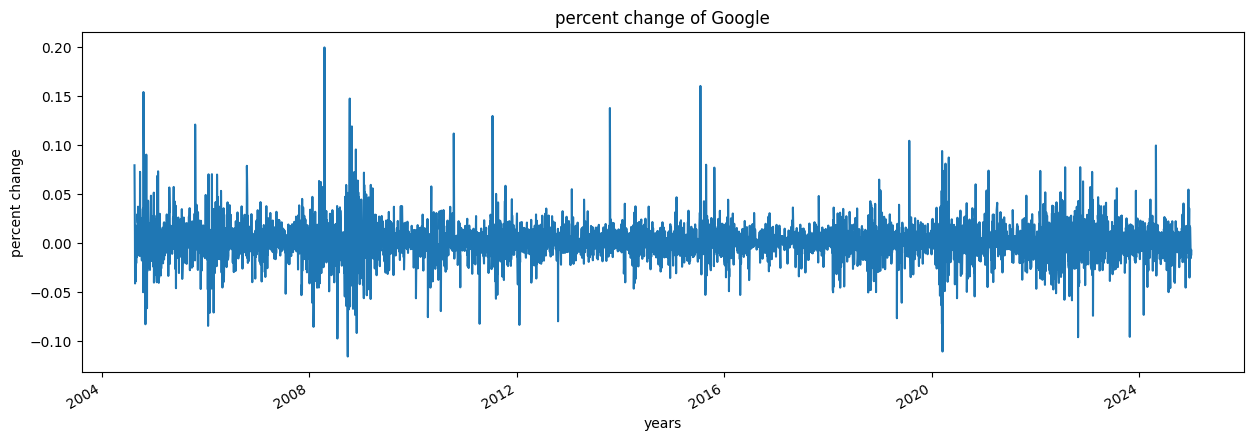

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[88]:


import yfinance as yf


# In[89]:


from datetime import datetime
end=datetime.now()
start=datetime(end.year-25,end.month,end.day)


# In[90]:


stock="GOOG"
google=yf.download(stock,start,end)


# In[91]:


google.head()


# In[92]:


google.describe()


# In[93]:


google.shape


# In[94]:


google.info()


# In[95]:


google.isna().sum()


# In[96]:


import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# In[97]:


def plot_graph(figsize,values,column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google")


# In[98]:


google.columns


# In[99]:


for column in google.columns:
    plot_graph((15,5),google[column],column)


# In[100]:


temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)


# In[101]:


import pandas as pd
data=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()


# In[102]:


data['MA']=data.rolling(5).mean()
data


# In[103]:


for i in range(2004,2025):
    print(i,list(google.index.year).count(i))


# In[104]:


google['MA250'] = google['Close'].rolling(250).mean()


# In[105]:


google['MA250'][0:250].tail()


# In[106]:


plot_graph((15,5),google[['Close','MA250']],'MA250')


# In[107]:


google['MA100'] = google['Close'].rolling(100).mean()
plot_graph((15,5),google[['Close','MA100']],'MA100')


# In[108]:


plot_graph((15,5),google[['Close','MA100','MA250']],'MA')


# In[109]:


google['percentchange_cp']=google['Close'].pct_change()
google[['Close','percentchange_cp']].head()


# In[110]:


plot_graph((15,5),google['percentchange_cp'],'percent change')


# In[111]:


close=google[['Close']]


# In[112]:


max(close.values),min(close.values)


# In[113]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(close)
scaled_data


# In[114]:


len(scaled_data)


# In[115]:


x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)


# In[116]:


x_data[0],y_data[0]


# In[117]:


int(len(x_data)*0.7)


# In[118]:


5127-100-int(len(x_data)*0.7)


# In[119]:


splitting_len=int(len(x_data)*0.7)


# In[120]:


splitting_len=int(len(x_data)*0.7)
x_train=x_data[:splitting_len]
y_train=y_data[:splitting_len]

x_test=x_data[splitting_len:]
y_test=y_data[splitting_len:]


# In[121]:


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))




In [4]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [6]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 312s 88ms/step - loss: 4.2924e-04
Epoch 2/2
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 324s 88ms/step - loss: 6.0178e-05
